<a href="https://colab.research.google.com/github/pedrohvel/Previs-o-de-pre-o-de-carros/blob/main/Previs%C3%A3o_pre%C3%A7o_carros_PHV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

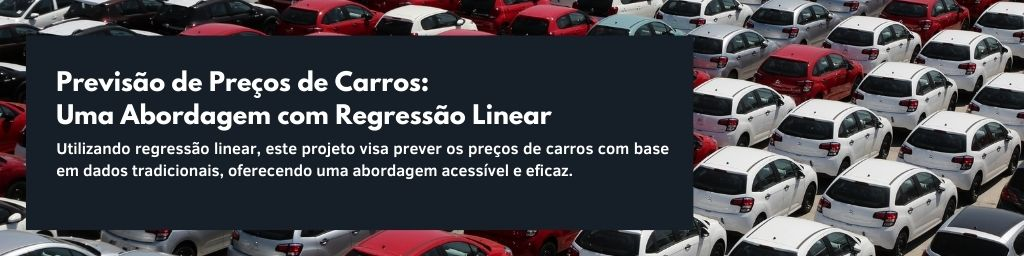
# Previsão de Preço de Carros

## Introdução

O projeto "Previsão_preço_carros_PHV.ipynb" tem como objetivo realizar a previsão de preços de carros com base em um conjunto de dados que abrange diversas informações relevantes sobre as características de diferentes veículos. Utilizando técnicas de regressão linear, uma abordagem clássica em aprendizado de máquina para prever valores numéricos, exploramos a biblioteca scikit-learn para criar, treinar e avaliar o modelo de regressão linear.

## Conjunto de Dados

O conjunto de dados utilizado é composto por informações como símbolo de classificação, nome do carro, tipo de combustível, aspiração, número de portas, estilo do carro, tipo de tração, localização do motor, entre outros. A variável alvo é o preço do carro, e nossa tarefa é prever esse valor com base nas características fornecidas.

## Método

Optamos pela regressão linear como método para a previsão de preços. Esta técnica estatística busca estabelecer uma relação linear entre as variáveis independentes (características do carro) e a variável dependente (preço do carro). Utilizaremos a biblioteca scikit-learn para criar, treinar e avaliar o modelo de regressão linear.

## Fluxo do Projeto

1. **Carregamento e Exploração do Conjunto de Dados:** Inicialmente, o conjunto de dados é carregado e explorado para entender sua estrutura e características.
  
2. **Análise Descritiva:** Realizamos uma análise descritiva para compreender a distribuição das variáveis e identificar possíveis padrões nos dados.

3. **Preparação dos Dados:** Os dados são preparados para o treinamento do modelo, incluindo tratamento de valores ausentes, codificação de variáveis categóricas e divisão do conjunto de dados em treino e teste.

4. **Treinamento do Modelo:** Criamos e treinamos um modelo de regressão linear utilizando as variáveis selecionadas.

5. **Avaliação do Modelo:** Avaliamos o desempenho do modelo utilizando métricas como o Erro Quadrático Médio (MSE) para determinar a precisão das previsões.

6. **Visualização dos Resultados:** Visualizamos os resultados, incluindo um gráfico de dispersão que compara as previsões do modelo com os valores reais.

## Conclusão

O projeto visa oferecer uma compreensão prática de como aplicar a regressão linear para prever preços de carros com base em características específicas. A conclusão incluirá insights sobre o desempenho do modelo e possíveis melhorias para futuras iterações.


# **Preparação do ambiente de execução**

In [1]:
# Instalar a versão específica do scipy
!pip install scipy==1.7.3

# Instalar pacotes necessários
!pip install shap
!pip install interpret
!pip install pycaret[full]

# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

# Configurar paleta de cores azul piscina/turquesa forte
turquoise_strong = ["#00CED1", "#00BFFF", "#00FFFF", "#00FFFF", "#00CED1", "#00BFFF"]

# Configurar o estilo do seaborn
sns.set(style="darkgrid", palette=turquoise_strong, rc={
    "axes.facecolor": "#282828",
    "grid.color": "#4d4d4d",
    "text.color": "white",
    "font.family": "sans-serif",
    "font.sans-serif": "DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif",
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "grid.linewidth": 1,
    "axes.edgecolor": "black"
})


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
jax 0.4.23 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
jaxlib 0.4.23+cuda12.cudnn89 requires scipy>=1.9, but you have scipy 1.7.3 which is incompatible.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
pycaret 3.

  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.4 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


# **Preprocessamento do conjunto de dados**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pedrohvel/Previs-o-de-pre-o-de-carros/main/CarPrice_Assignment.csv')

In [3]:
df = df.dropna()

In [4]:
df['price'] = df['price'].astype('float')

In [5]:
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()

In [6]:
display(df.head())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.027324
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0.403473
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0.403473
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0.084279
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0.522389


In [7]:
# Exibir as features do conjunto de dados
features = df.columns
print("Features:", features)

Features: Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [8]:
# Remover as colunas 'CarName' e 'car_ID'
df = df.drop(columns=['CarName', 'car_ID'])

# **Análise exploratória**

In [9]:
print(df.dtypes)

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [10]:
print(df.isnull().sum())

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [11]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [12]:
# Sumário estatístico das variáveis numéricas
display(df.describe())

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,1.733031e-16
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,1.000000e+00
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,-1.021262e+00
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,-6.870462e-01
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,-3.732339e-01
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,4.038489e-01
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,4.021014e+00


In [13]:
# Contagem de valores únicos nas variáveis categóricas
print("Valores Únicos:")
for col in df.select_dtypes(include=['object']).columns:
    print(col, ":", len(df[col].unique()))

Valores Únicos:
fueltype : 2
aspiration : 2
doornumber : 2
carbody : 5
drivewheel : 3
enginelocation : 2
enginetype : 7
cylindernumber : 7
fuelsystem : 8


# **Visualização de dados**

**Gráfico 1: Histograma de 'wheelbase'**

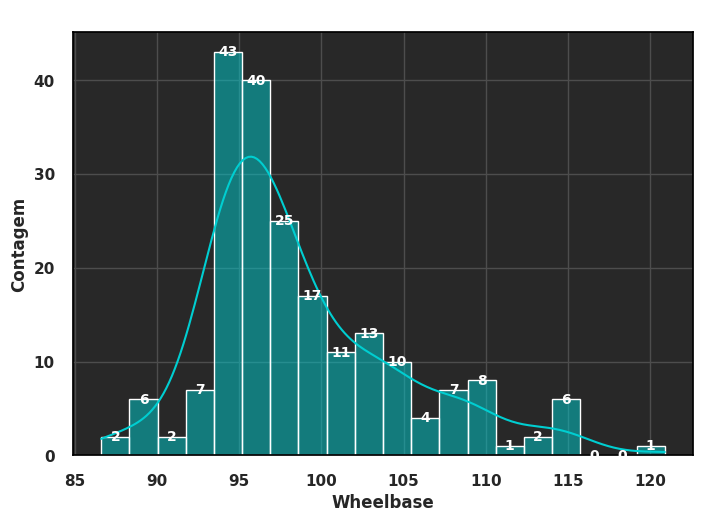

In [14]:
ax = sns.histplot(df['wheelbase'], bins=20, kde=True)

# Adicionar os valores na parte superior do histograma
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.title('Histograma de Wheelbase')
plt.xlabel('Wheelbase')
plt.ylabel('Contagem')
plt.show()

**Histograma de uma Coluna Numérica (por exemplo, 'horsepower')**

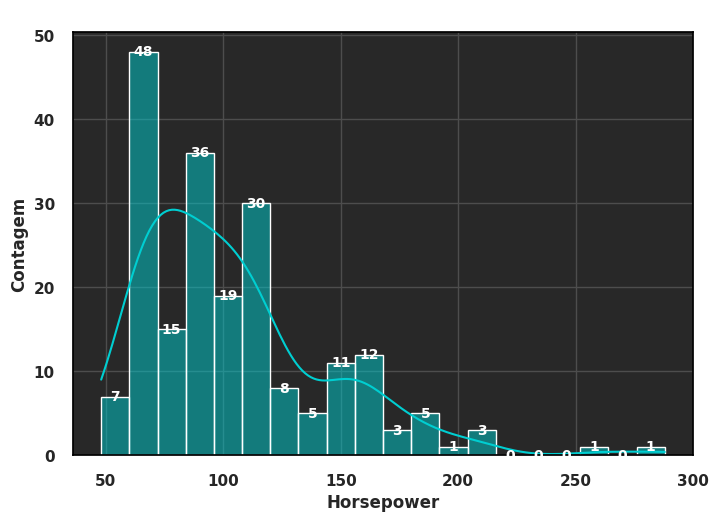

In [15]:
# Gráfico: Histograma de 'horsepower'
ax = sns.histplot(df['horsepower'], bins=20, kde=True)

# Adicionar os valores na parte superior do histograma
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.title('Distribuição de Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Contagem')
plt.show()

**Contagem de Carros por Tipo de Combustível**

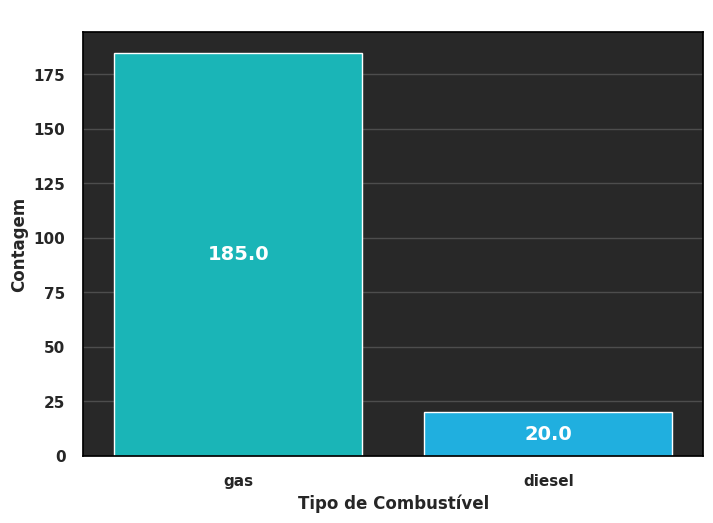

In [16]:
# Gráfico: Contagem de Carros por Tipo de Combustível
ax = sns.countplot(x='fueltype', data=df)

# Adicionar os valores no centro das colunas
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha='center', va='center', color='white', fontsize=14, fontweight='bold')

plt.title('Contagem de Carros por Tipo de Combustível')
plt.xlabel('Tipo de Combustível')
plt.ylabel('Contagem')
plt.show()

**Dispersão entre Preço e Horsepower**

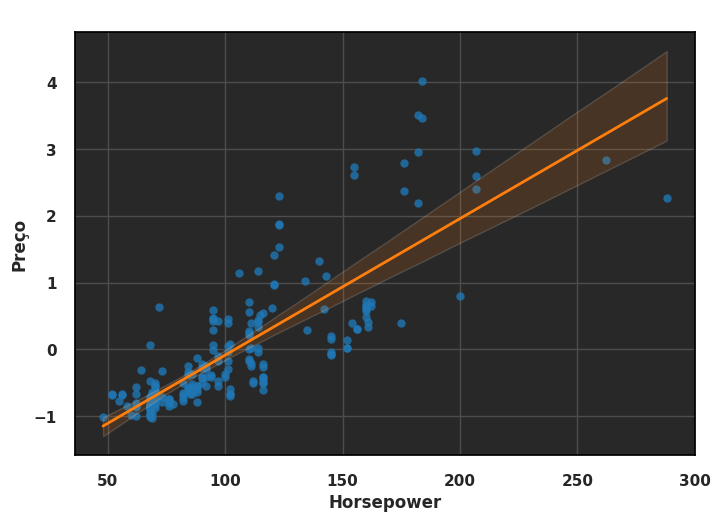

In [17]:
# Gráfico: Dispersão entre Preço e Horsepower com Linha de Regressão
sns.regplot(x='horsepower', y='price', data=df, scatter_kws={'color': '#1f77b4'}, line_kws={'color': '#ff7f0e', 'linewidth': 2})
plt.title('Dispersão entre Preço e Horsepower com Linha de Regressão')
plt.xlabel('Horsepower')
plt.ylabel('Preço')
plt.show()

**Correlação entre Variáveis Numéricas**

**Mapa de Calor da Matriz de Correlação**

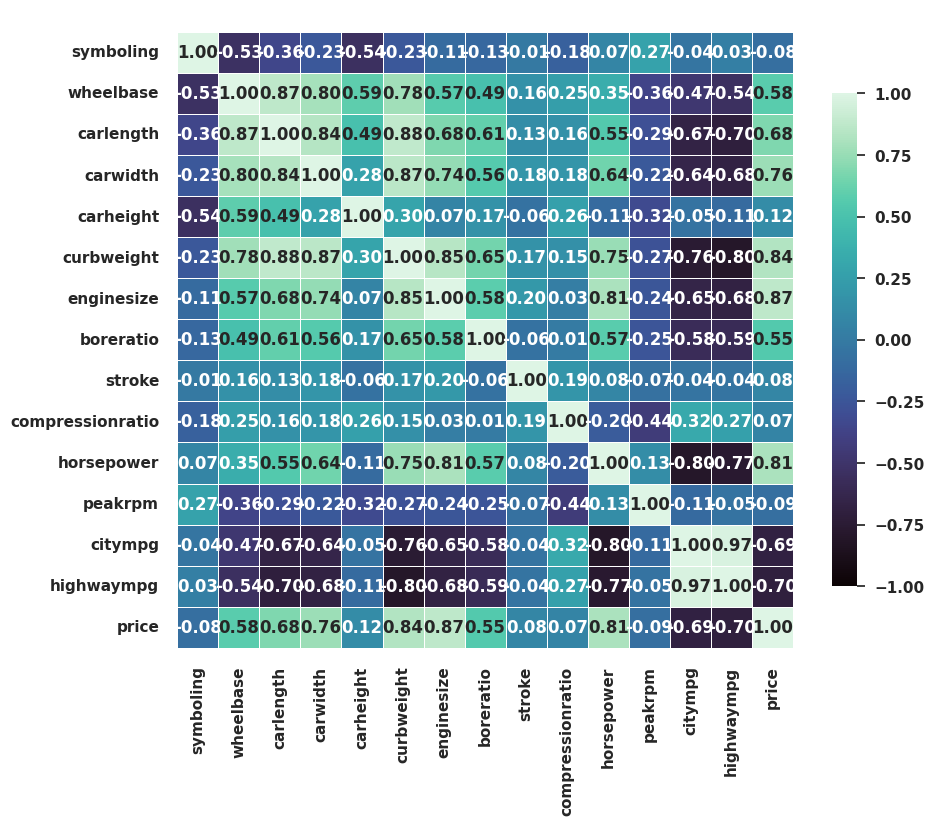

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="mako", linewidths=.5, square=True, fmt=".2f",
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

# **Modelagem Preditiva**

**Conclusão**

O projeto visa fornecer uma compreensão prática de como aplicar a regressão linear para prever preços de carros com base em características específicas. A conclusão incluirá insights sobre o desempenho do modelo e possíveis melhorias para futuras iterações.

**Avaliação do Processo de Tunagem do Modelo**

Durante a etapa de tunagem do modelo, foram realizados experimentos com diferentes combinações de hiperparâmetros para otimizar o desempenho do modelo de regressão linear.

In [19]:
# Configurar o ambiente
exp = setup(df, target='price', session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(205, 24)"
4,Transformed data shape,"(205, 47)"
5,Transformed train set shape,"(143, 47)"
6,Transformed test set shape,"(62, 47)"
7,Ordinal features,4
8,Numeric features,14
9,Categorical features,9


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1919,0.0806,0.2717,0.8869,0.1512,1.1938,0.2960
catboost,CatBoost Regressor,0.1987,0.0902,0.2840,0.8788,0.1505,1.1740,1.7180
rf,Random Forest Regressor,0.1979,0.0907,0.2844,0.8700,0.1528,0.9922,0.3410
gbr,Gradient Boosting Regressor,0.1990,0.0911,0.2868,0.8678,0.1467,1.1369,0.2190
ada,AdaBoost Regressor,0.2299,0.0927,0.2959,0.8651,0.1650,0.9165,0.3600
xgboost,Extreme Gradient Boosting,0.1960,0.0925,0.2845,0.8625,0.1500,1.1880,0.2170
lightgbm,Light Gradient Boosting Machine,0.2288,0.1155,0.3187,0.8567,0.1612,1.2306,0.2400
ridge,Ridge Regression,0.2494,0.1152,0.3340,0.8541,0.1745,1.3086,0.3940
br,Bayesian Ridge,0.2602,0.1252,0.3456,0.8484,0.1819,1.3856,0.1570
dt,Decision Tree Regressor,0.2314,0.1196,0.3322,0.8374,0.1660,1.1477,0.1540


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=42)

In [21]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2453,0.0941,0.3067,0.7751,0.1815,0.9464
1,0.2703,0.1485,0.3854,0.8273,0.1726,0.7036
2,0.2528,0.0894,0.2990,0.8693,0.1927,0.8409
3,0.2371,0.1542,0.3927,0.7749,0.1814,0.9829
4,0.1993,0.0621,0.2492,0.7503,0.1683,4.3386
5,0.1963,0.0717,0.2677,0.9453,0.1074,0.6592
6,0.1962,0.0888,0.2981,0.9167,0.1335,0.5038
7,0.4573,0.5048,0.7105,0.5887,0.3230,1.5012
8,0.2490,0.1202,0.3468,0.8172,0.2024,2.3542


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2453,0.0941,0.3067,0.7751,0.1815,0.9464
1,0.2703,0.1485,0.3854,0.8273,0.1726,0.7036
2,0.2528,0.0894,0.2990,0.8693,0.1927,0.8409
3,0.2371,0.1542,0.3927,0.7749,0.1814,0.9829
4,0.1993,0.0621,0.2492,0.7503,0.1683,4.3386
5,0.1963,0.0717,0.2677,0.9453,0.1074,0.6592
6,0.1962,0.0888,0.2981,0.9167,0.1335,0.5038
7,0.4573,0.5048,0.7105,0.5887,0.3230,1.5012
8,0.2490,0.1202,0.3468,0.8172,0.2024,2.3542


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


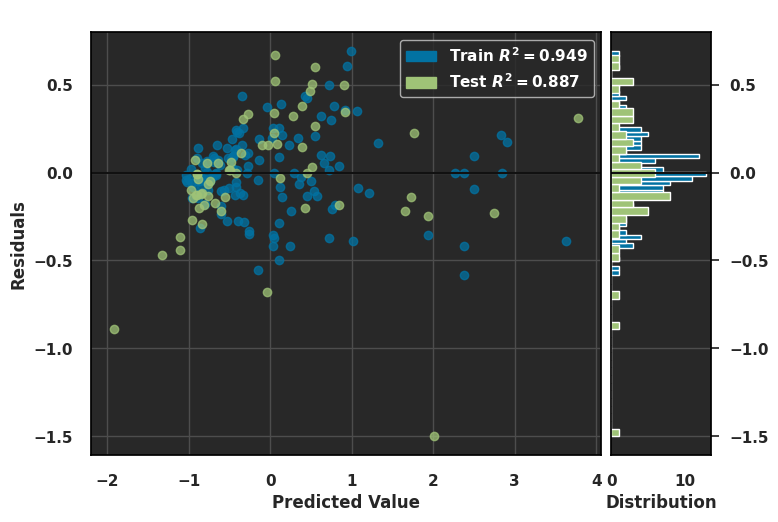

In [23]:
plot_model(tuned_lr, plot='residuals')

In [24]:
# Gerar dados artificiais para prever (10 vezes maior)
artificial_data = df.copy()
artificial_data.drop('price', axis=1, inplace=True)  # Remover a variável alvo
artificial_data = pd.concat([artificial_data] * 100, ignore_index=True)  # Criar dados 100 vezes maiores

# Fazer previsões no conjunto de dados artificial
predictions = predict_model(tuned_lr, data=artificial_data)

# Visualizar as previsões
print(predictions)

       symboling fueltype aspiration doornumber      carbody drivewheel  \
0              3      gas        std        two  convertible        rwd   
1              3      gas        std        two  convertible        rwd   
2              1      gas        std        two    hatchback        rwd   
3              2      gas        std       four        sedan        fwd   
4              2      gas        std       four        sedan        4wd   
...          ...      ...        ...        ...          ...        ...   
20495         -1      gas        std       four        sedan        rwd   
20496         -1      gas      turbo       four        sedan        rwd   
20497         -1      gas        std       four        sedan        rwd   
20498         -1   diesel      turbo       four        sedan        rwd   
20499         -1      gas      turbo       four        sedan        rwd   

      enginelocation   wheelbase   carlength   carwidth  ...  enginesize  \
0              front   